In [1]:
install.packages("readxl")
install.packages("dplyr")
install.packages("knitr")
install.packages("mice")
install.packages("reshape2")
install.packages("corrplot")
install.packages("readr")
install.packages("stringr")
install.packages("lubridate")
install.packages("hms")
install.packages("writexl")
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("ggplot2")
install.packages("openxlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

In

In [6]:
library(readxl)
library(dplyr)
library(knitr)
library(ggplot2)
library(mice)
library(reshape2)
library(corrplot)
library(readr)
library(stringr)
library(lubridate)
library(hms)
library(writexl)
library(FactoMineR)
library(factoextra)
library(ggplot2)
library(openxlsx)
library(ggpubr)



# **CASO 1**

## **ETAPA 0**. LIMPIEZA E IMPUTACIÓN


In [4]:
df_caso1 <- read_excel("df_caso1.xlsx")


dim(df_caso1)

str(df_caso1)

head(df_caso1, 10)

[1] 300  11

tibble [300 × 11] (S3: tbl_df/tbl/data.frame)
 $ req_rate    : num [1:300] NA 179 261 214 214 ...
 $ cpu_util    : num [1:300] 44.3 NA 70.2 45.7 53.2 ...
 $ mem_util    : num [1:300] 44.6 50.4 65.1 57.8 61.5 ...
 $ gpu_util    : num [1:300] 19.3 27.3 54 42.4 NA ...
 $ p50_latency : num [1:300] 95 NA 104.2 94.7 102 ...
 $ p95_latency : num [1:300] 168 168 170 168 184 ...
 $ timeout_rate: num [1:300] -1.659 -0.547 -1.211 -0.883 -0.285 ...
 $ queue_len   : num [1:300] 7.71 7.51 6.26 6.36 12.87 ...
 $ disk_io     : num [1:300] 50 62.9 55.9 45.6 40.2 ...
 $ net_in      : num [1:300] 61.5 66.9 62.5 52.5 66.3 ...
 $ net_out     : num [1:300] 50.1 56.7 64.9 57.4 56.8 ...


req_rate,cpu_util,mem_util,gpu_util,p50_latency,p95_latency,timeout_rate,queue_len,disk_io,net_in,net_out
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,44.32321,44.57507,19.26239,94.97738,168.3258,-1.6592506,7.706195,50.04404,61.49192,50.10022
179.1163,NA,50.40925,27.32759,NA,168.2047,-0.5473892,7.511553,62.93526,66.92107,56.68764
260.6516,70.23352,65.13805,53.98072,104.15590,169.7323,-1.2111912,6.260759,55.93084,62.53779,64.86292
213.9483,45.74935,57.78791,42.40458,94.73634,167.6039,-0.8825561,6.358044,45.63268,52.49116,57.42772
213.8319,53.19809,61.45749,NA,102.02709,183.8532,-0.2850418,12.869480,40.22474,66.25733,56.84495
264.0128,75.62978,83.11790,59.54391,93.87520,188.6435,2.1384338,11.629358,NA,66.48363,64.14325
216.6248,47.54880,NA,41.26725,90.40687,NA,-2.2107016,6.565170,54.85931,57.95161,NA
149.9718,39.67521,38.18746,17.30432,96.22047,160.5598,NA,9.620631,48.78034,38.68289,54.76122
181.7224,42.27298,54.49052,27.59591,105.82516,188.2914,2.4065202,13.662998,NA,68.36822,62.06247


* req_rate — solicitudes por segundo (req/s): mide la tasa de peticiones que procesa el nodo. Valores altos = más carga de trabajo.

* cpu_util — porcentaje (%) de uso de CPU: indica qué tanto se usa el procesador. 100 % = completamente ocupado.

* mem_util — porcentaje (%) de uso de memoria RAM: muestra cuánta RAM consume el nodo; valores altos pueden indicar sobrecarga.

* gpu_util — porcentaje (%) de uso de GPU: refleja el nivel de procesamiento en GPU, importante en tareas de IA.

* p50_latency — milisegundos (ms): representa la latencia mediana o tiempo típico de respuesta; menor = mejor rendimiento.

* p95_latency — milisegundos (ms): muestra la latencia del percentil 95; valores altos indican colas o demoras bajo carga.

* timeout_rate — porcentaje (%) de peticiones que expiran: mide fallos o saturación (idealmente 0 %).(Hay negativos, 0 % significa que todas las peticiones fueron exitosas, 100 % (o más) sería imposible pero podría indicar un error de registro. Valores negativos carecen de sentido físico, porque no existen “peticiones fallidas negativas”.)

* queue_len — cantidad (número de peticiones en cola): refleja el nivel de congestión; mayor = sistema más saturado.

* disk_io — operaciones por segundo (IOPS): muestra la actividad del disco (lectura/escritura); altos valores pueden ser normales o presión de I/O.

* net_in — megabytes por segundo (MB/s): flujo de datos entrante a la red del nodo (solicitudes o pesos de modelos).

* net_out — megabytes por segundo (MB/s): flujo de datos saliente de la red del nodo (respuestas, predicciones o logs).

### **CORRECIÓN timeout_rate = (# timeouts / # solicitudes) × 100.**

* Es una proporción, así que su rango lógico es [0, 100] % (o [0,1] si está en fracción).

* Qué vimos en tus datos: el mínimo es −4.342560. Una proporción no puede ser negativa.

In [5]:
data.frame(
  Variable = names(df_caso1),
  Min = sapply(df_caso1, min, na.rm = TRUE),
  Max = sapply(df_caso1, max, na.rm = TRUE)
)


,Variable,Min,Max
,<chr>,<dbl>,<dbl>
req_rate,req_rate,78.265917,338.053653
cpu_util,cpu_util,17.931592,91.183434
mem_util,mem_util,26.766429,88.569861
gpu_util,gpu_util,5.514807,84.885552
p50_latency,p50_latency,75.496339,126.175640
p95_latency,p95_latency,143.554981,275.417279
timeout_rate,timeout_rate,-4.342560,5.976419
queue_len,queue_len,1.623331,20.228963
disk_io,disk_io,29.278835,68.634592


In [6]:
range(df_caso1$timeout_rate, na.rm = TRUE)
sum(df_caso1$timeout_rate < 0, na.rm = TRUE) # cuántos negativos hay


[1] -4.342560  5.976419

[1] 81

In [7]:
# Reemplazar negativos por NA
df_caso1$timeout_rate[df_caso1$timeout_rate < 0] <- NA

In [8]:
range(df_caso1$timeout_rate, na.rm = TRUE)
sum(df_caso1$timeout_rate < 0, na.rm = TRUE) # cuántos negativos hay


[1] 0.006600296 5.976419024

[1] 0

### **CAMBIO DE NOMBRES DE VARIABLES**

In [9]:
names(df_caso1) <- c(
  "tasa_solicitudes",   # req_rate
  "uso_cpu",            # cpu_util
  "uso_memoria",        # mem_util
  "uso_gpu",            # gpu_util
  "latencia_p50",       # p50_latency
  "latencia_p95",       # p95_latency
  "tasa_timeouts",      # timeout_rate
  "longitud_cola",      # queue_len
  "io_disco",           # disk_io
  "red_entrada",        # net_in
  "red_salida"          # net_out
)

names(df_caso1)


[1] "tasa_solicitudes" "uso_cpu"          "uso_memoria"      "uso_gpu"         
 [5] "latencia_p50"     "latencia_p95"     "tasa_timeouts"    "longitud_cola"   
 [9] "io_disco"         "red_entrada"      "red_salida"

### **A. DATOS NULOS**

In [10]:
tabla_na <- data.frame(
  Variable = names(df_caso1),
  Faltantes = colSums(is.na(df_caso1)),
  Porcentaje = round(colSums(is.na(df_caso1)) / nrow(df_caso1) * 100, 2)
)


tabla_na %>% arrange(desc(Porcentaje))


,Variable,Faltantes,Porcentaje
,<chr>,<dbl>,<dbl>
tasa_timeouts,tasa_timeouts,108,36
tasa_solicitudes,tasa_solicitudes,27,9
uso_cpu,uso_cpu,27,9
uso_memoria,uso_memoria,27,9
uso_gpu,uso_gpu,27,9
latencia_p50,latencia_p50,27,9
latencia_p95,latencia_p95,27,9
longitud_cola,longitud_cola,27,9
io_disco,io_disco,27,9


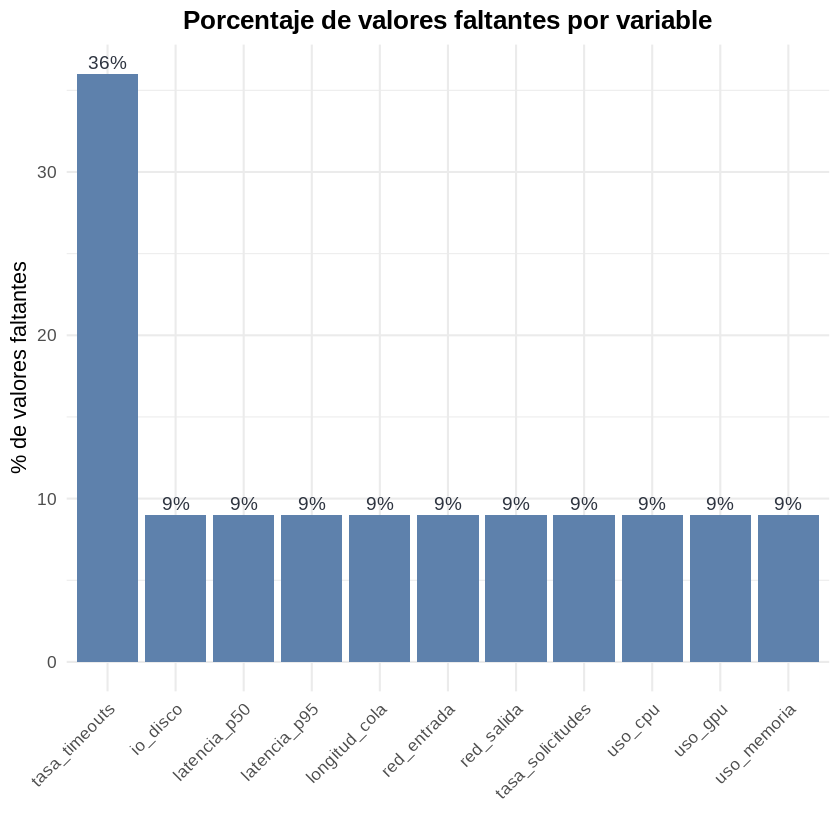

In [11]:
g1 <- ggplot(tabla_na, aes(x = reorder(Variable, -Porcentaje), y = Porcentaje)) +
  geom_col(fill = "#5E81AC") +
  geom_text(aes(label = paste0(Porcentaje, "%")), vjust = -0.4, size = 4, color = "#2E3440") +
  labs(
    title = "Porcentaje de valores faltantes por variable",
    x = NULL, y = "% de valores faltantes"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

print(g1)

### **B. IMPUTACIÓN**

In [12]:
set.seed(123)
imputacion <- mice(df_caso1, method = "pmm", m = 5, seed = 123)  # pmm = Predictive Mean Matching
df_caso1_imputado <- complete(imputacion, 1)


 iter imp variable
  1   1  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia_p95  tasa_timeouts  longitud_cola  io_disco  red_entrada  red_salida
  1   2  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia_p95  tasa_timeouts  longitud_cola  io_disco  red_entrada  red_salida
  1   3  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia_p95  tasa_timeouts  longitud_cola  io_disco  red_entrada  red_salida
  1   4  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia_p95  tasa_timeouts  longitud_cola  io_disco  red_entrada  red_salida
  1   5  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia_p95  tasa_timeouts  longitud_cola  io_disco  red_entrada  red_salida
  2   1  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia_p95  tasa_timeouts  longitud_cola  io_disco  red_entrada  red_salida
  2   2  tasa_solicitudes  uso_cpu  uso_memoria  uso_gpu  latencia_p50  latencia

In [13]:
dim(df_caso1_imputado)
t(colSums(is.na(df_caso1_imputado)))

[1] 300  11

tasa_solicitudes,uso_cpu,uso_memoria,uso_gpu,latencia_p50,latencia_p95,tasa_timeouts,longitud_cola,io_disco,red_entrada,red_salida
0,0,0,0,0,0,0,0,0,0,0


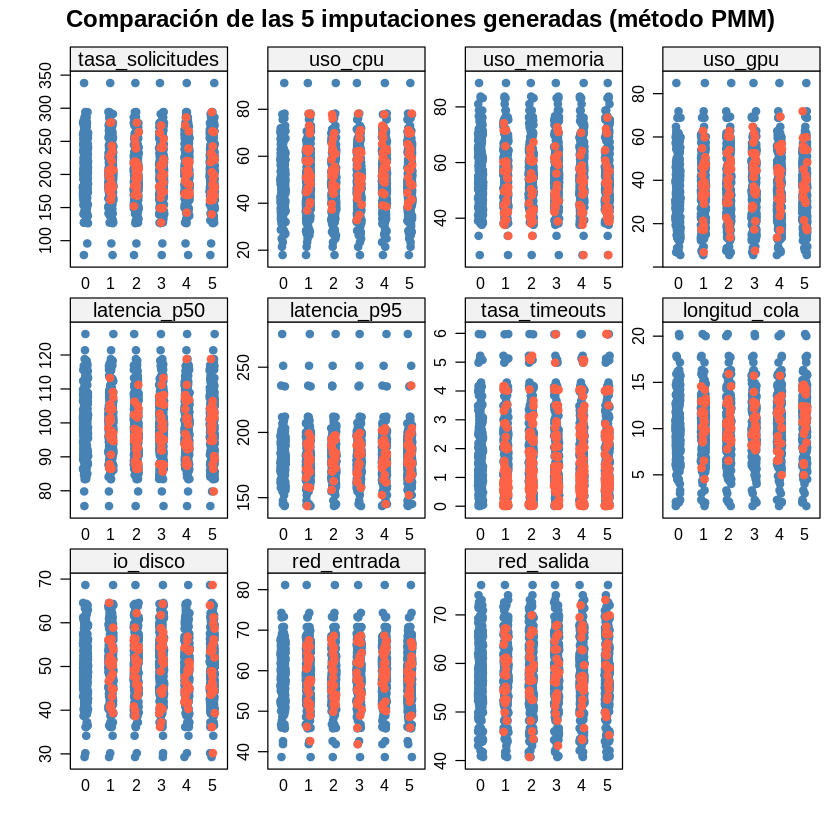

In [14]:
g2 <- stripplot(imputacion,
          pch = 20, cex = 1.1,
          col = c("steelblue", "tomato"),
          main = "Comparación de las 5 imputaciones generadas (método PMM)")

print(g2)

Warning message:
“Removed 378 rows containing non-finite outside the scale range
(`stat_density()`).”


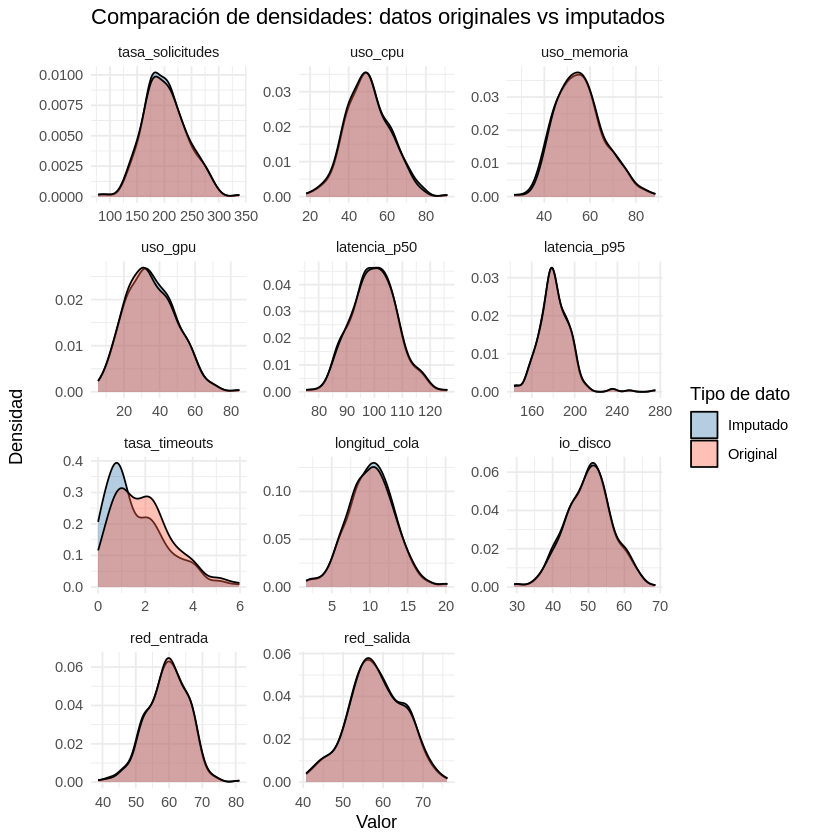

In [15]:
df_comp <- rbind(
  transform(df_caso1, tipo = "Original"),
  transform(df_caso1_imputado, tipo = "Imputado")
)

g3 <- ggplot(melt(df_comp, id.vars = "tipo"), aes(x = value, fill = tipo)) +
  geom_density(alpha = 0.4) +
  facet_wrap(~variable, scales = "free", ncol = 3) +
  scale_fill_manual(values = c("steelblue", "tomato")) +
  theme_minimal() +
  labs(
    title = "Comparación de densidades: datos originales vs imputados",
    x = "Valor", y = "Densidad", fill = "Tipo de dato"
  )

  print(g3)

### **C. EDA**

In [16]:
resumen_estad <- data.frame(
  Variable = names(df_caso1_imputado),
  Minimo = round(sapply(df_caso1_imputado, min), 2),
  Maximo = round(sapply(df_caso1_imputado, max), 2),
  Media = round(sapply(df_caso1_imputado, mean), 2),
  Mediana = round(sapply(df_caso1_imputado, median), 2),
  DesvEstandar = round(sapply(df_caso1_imputado, sd), 2)
)

print(resumen_estad)



                         Variable Minimo Maximo  Media Mediana DesvEstandar
tasa_solicitudes tasa_solicitudes  78.27 338.05 201.67  198.61        39.02
uso_cpu                   uso_cpu  17.93  91.18  50.51   49.90        11.55
uso_memoria           uso_memoria  26.77  88.57  55.45   54.69        10.48
uso_gpu                   uso_gpu   5.51  84.89  35.47   34.32        13.90
latencia_p50         latencia_p50  75.50 126.18  99.86   99.89         8.07
latencia_p95         latencia_p95 143.55 275.42 181.17  180.18        15.12
tasa_timeouts       tasa_timeouts   0.01   5.98   1.60    1.22         1.27
longitud_cola       longitud_cola   1.62  20.23  10.23   10.19         3.05
io_disco                 io_disco  29.28  68.63  50.10   50.55         6.47
red_entrada           red_entrada  38.68  81.13  59.42   59.84         6.25
red_salida             red_salida  40.71  76.15  58.26   57.73         6.89


No id variables; using all as measure variables



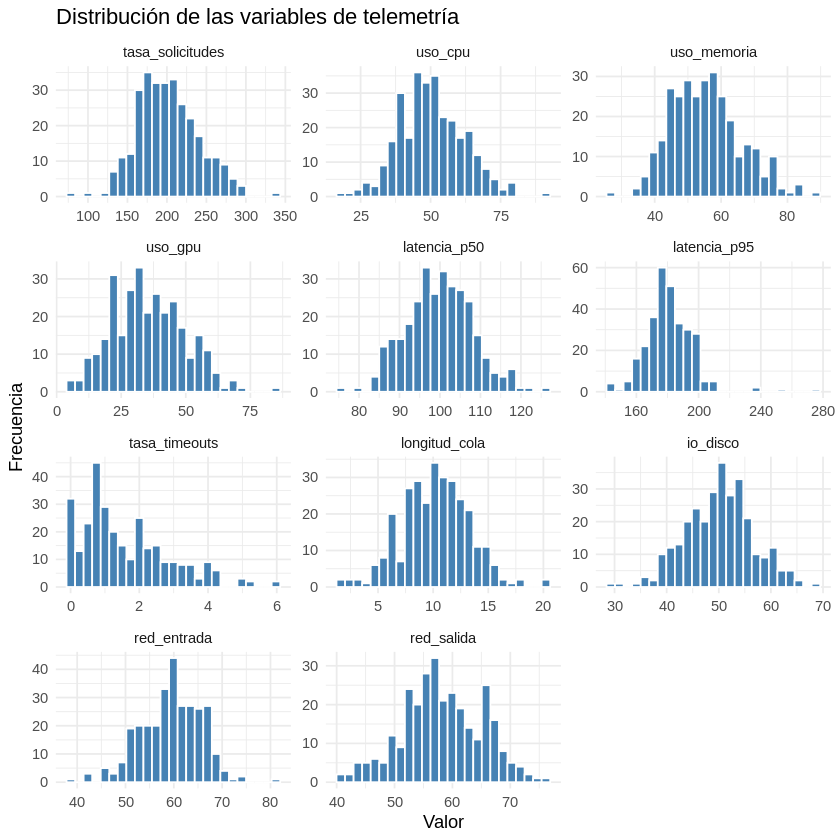

In [17]:
df_long <- melt(df_caso1_imputado)


g4 <- ggplot(df_long, aes(x = value)) +
  geom_histogram(bins = 25, fill = "steelblue", color = "white") +
  facet_wrap(~variable, scales = "free", ncol = 3) +
  theme_minimal() +
  labs(
    title = "Distribución de las variables de telemetría",
    x = "Valor",
    y = "Frecuencia"
  )


  print(g4)

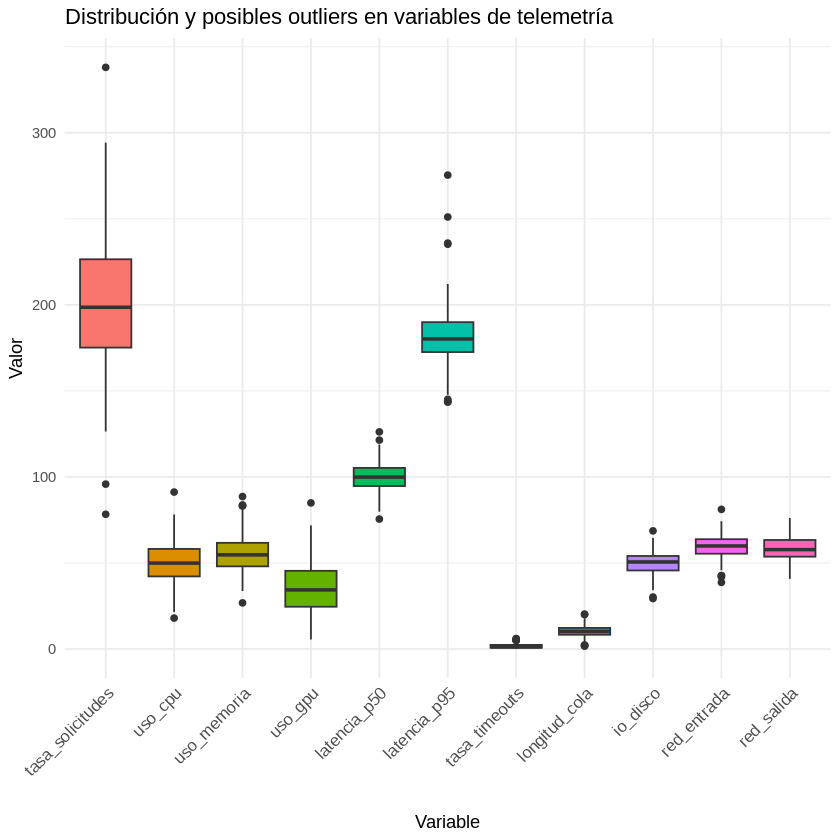

In [18]:
g5 <- ggplot(df_long, aes(x = variable, y = value, fill = variable)) +
  geom_boxplot() +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10)
  ) +
  labs(
    title = "Distribución y posibles outliers en variables de telemetría",
    x = "Variable",
    y = "Valor"
  )


print(g5)


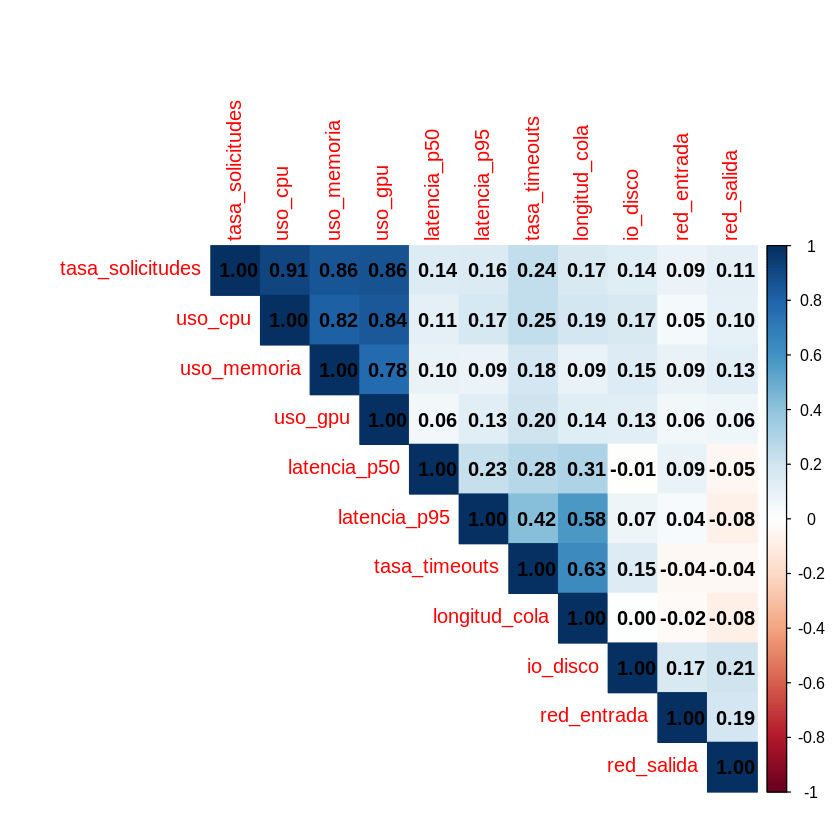

In [19]:

g6 <- corrplot(cor(df_caso1_imputado), method = "color", type = "upper", addCoef.col = "black")


## **ETAPA 1. ACP**


In [21]:
write.csv(df_caso1_imputado, "df_caso1_limpio.csv", row.names = FALSE)


In [7]:
df_caso1_limpio <- read.csv("df_caso1_limpio.csv")

data.frame(
  Variable = names(df_caso1_limpio),
  Tipo_de_dato = sapply(df_caso1_limpio, class)
)


,Variable,Tipo_de_dato
,<chr>,<chr>
tasa_solicitudes,tasa_solicitudes,numeric
uso_cpu,uso_cpu,numeric
uso_memoria,uso_memoria,numeric
uso_gpu,uso_gpu,numeric
latencia_p50,latencia_p50,numeric
latencia_p95,latencia_p95,numeric
tasa_timeouts,tasa_timeouts,numeric
longitud_cola,longitud_cola,numeric
io_disco,io_disco,numeric


In [8]:
head(df_caso1_limpio, 20)


,tasa_solicitudes,uso_cpu,uso_memoria,uso_gpu,latencia_p50,latencia_p95,tasa_timeouts,longitud_cola,io_disco,red_entrada,red_salida
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,173.89309,44.32321,44.57507,19.26239,94.97738,168.3258,0.10246634,7.706195,50.04404,61.49192,50.10022
2,179.11632,51.89695,50.40925,27.32759,97.70407,168.2047,0.10246634,7.511553,62.93526,66.92107,56.68764
3,260.65158,70.23352,65.13805,53.98072,104.15590,169.7323,0.10246634,6.260759,55.93084,62.53779,64.86292
4,213.94829,45.74935,57.78791,42.40458,94.73634,167.6039,0.86435799,6.358044,45.63268,52.49116,57.42772
5,213.83188,53.19809,61.45749,42.63682,102.02709,183.8532,1.07050255,12.869480,40.22474,66.25733,56.84495
6,264.01282,75.62978,83.11790,59.54391,93.87520,188.6435,2.13843384,11.629358,58.88930,66.48363,64.14325
7,216.62482,47.54880,50.98280,41.26725,90.40687,178.4785,2.72888049,6.565170,54.85931,57.95161,67.19643
8,149.97177,39.67521,38.18746,17.30432,96.22047,160.5598,0.19283688,9.620631,48.78034,38.68289,54.76122
9,181.72240,42.27298,54.49052,27.59591,105.82516,188.2914,2.40652015,13.662998,40.27400,68.36822,62.06247


**ACP sin seleccionar componentes**

In [9]:
res_acp <- PCA(df_caso1_limpio,
               scale.unit = TRUE,
               graph = FALSE)


**% de Variabildiad explicada**

**SCREEPLOT**

Warning message in geom_bar(stat = "identity", fill = barfill, color = barcolor, :
“Ignoring empty aesthetic: `width`.”


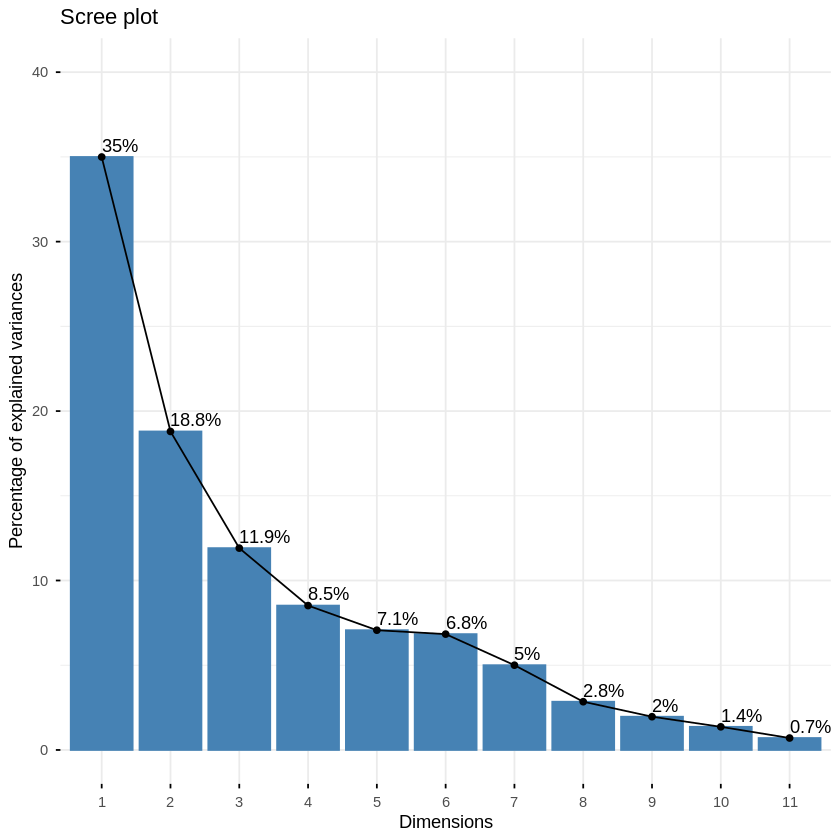

In [8]:
fviz_eig(res_acp, addlabels = TRUE, ncp = 11, ylim = c(0, 40))

**TABLA**

In [9]:
res_acp$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.84931586,34.9937806,34.99378
comp 2,2.06746684,18.7951531,53.78893
comp 3,1.31015404,11.9104913,65.69942
comp 4,0.93713203,8.5193821,74.21881
comp 5,0.77735700,7.0668818,81.28569
comp 6,0.75191070,6.8355519,88.12124
comp 7,0.55018977,5.0017252,93.12297
comp 8,0.31309888,2.8463534,95.96932
comp 9,0.21577624,1.9616022,97.93092
comp 10,0.15015835,1.3650759,99.29600


**ACP con componentes seleccionados**

In [10]:
res_acp2 <- PCA(df_caso1_limpio,
               ncp = 4,
               scale.unit = TRUE,
               graph = FALSE)

**BIPLOT**

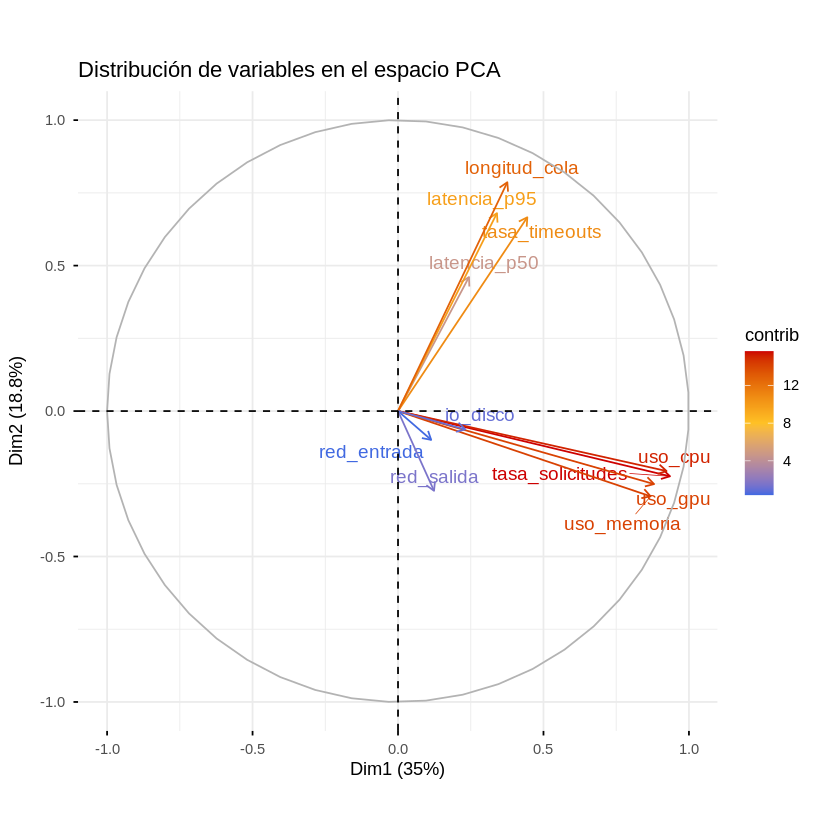

In [12]:
fviz_pca_var(res_acp2,
             col.var = "contrib",
             gradient.cols = c("royalblue", "goldenrod1", "red3"),
             repel = TRUE,
             title = "Distribución de variables en el espacio PCA")


**combinaciones con C1**

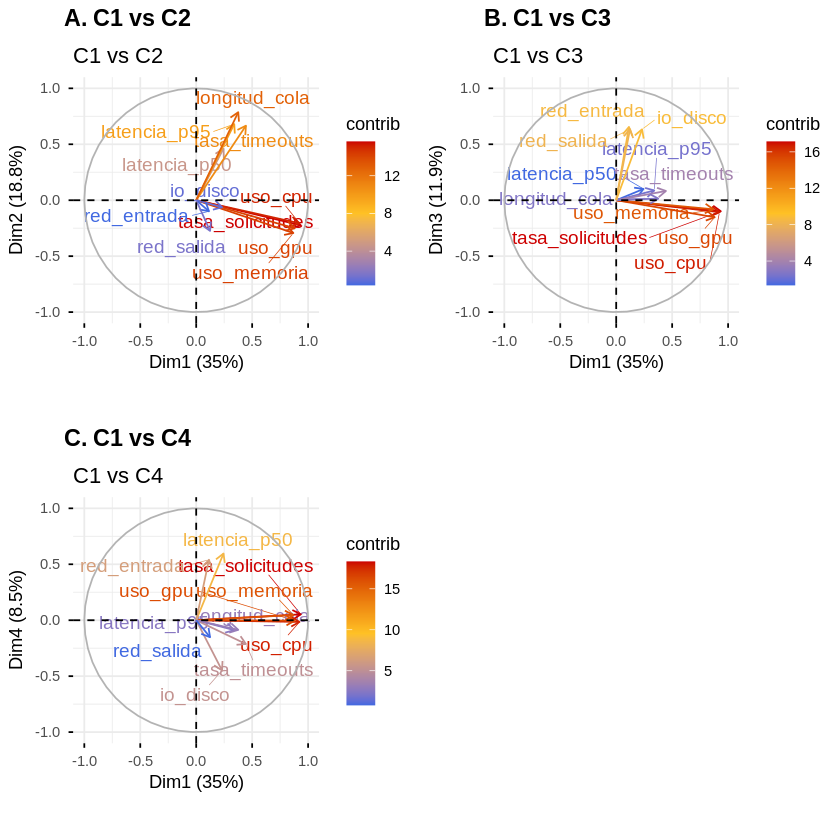

In [13]:

g1 <- fviz_pca_var(res_acp2, axes = c(1, 2),
                   col.var = "contrib",
                   gradient.cols = c("royalblue", "goldenrod1", "red3"),
                   repel = TRUE,
                   title = "C1 vs C2")

g2 <- fviz_pca_var(res_acp2, axes = c(1, 3),
                   col.var = "contrib",
                   gradient.cols = c("royalblue", "goldenrod1", "red3"),
                   repel = TRUE,
                   title = "C1 vs C3")

g3 <- fviz_pca_var(res_acp2, axes = c(1, 4),
                   col.var = "contrib",
                   gradient.cols = c("royalblue", "goldenrod1", "red3"),
                   repel = TRUE,
                   title = "C1 vs C4")

ggarrange(g1, g2, g3,
          ncol = 2, nrow = 2,
          labels = c("A. C1 vs C2", "B. C1 vs C3", "C. C1 vs C4"))


**combinaciones entre C2, C3 y C4**

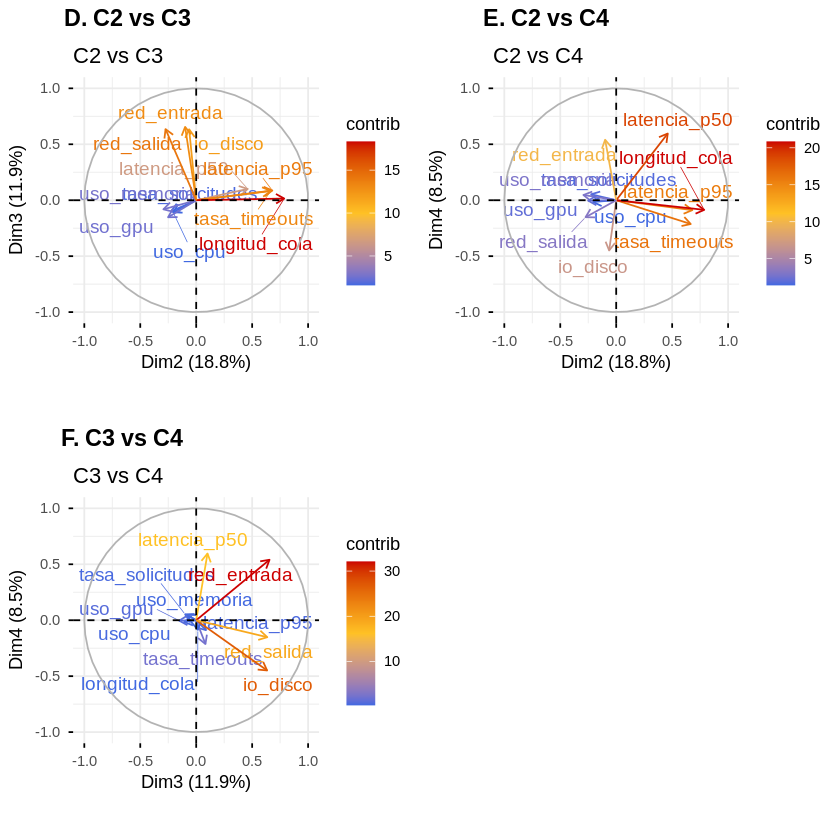

In [14]:
g4 <- fviz_pca_var(res_acp2, axes = c(2, 3),
                   col.var = "contrib",
                   gradient.cols = c("royalblue", "goldenrod1", "red3"),
                   repel = TRUE,
                   title = "C2 vs C3")

g5 <- fviz_pca_var(res_acp2, axes = c(2, 4),
                   col.var = "contrib",
                   gradient.cols = c("royalblue", "goldenrod1", "red3"),
                   repel = TRUE,
                   title = "C2 vs C4")

g6 <- fviz_pca_var(res_acp2, axes = c(3, 4),
                   col.var = "contrib",
                   gradient.cols = c("royalblue", "goldenrod1", "red3"),
                   repel = TRUE,
                   title = "C3 vs C4")

ggarrange(g4, g5, g6,
          ncol = 2, nrow = 2,
          labels = c("D. C2 vs C3", "E. C2 vs C4", "F. C3 vs C4"))


**Contirbuciones de las variables**

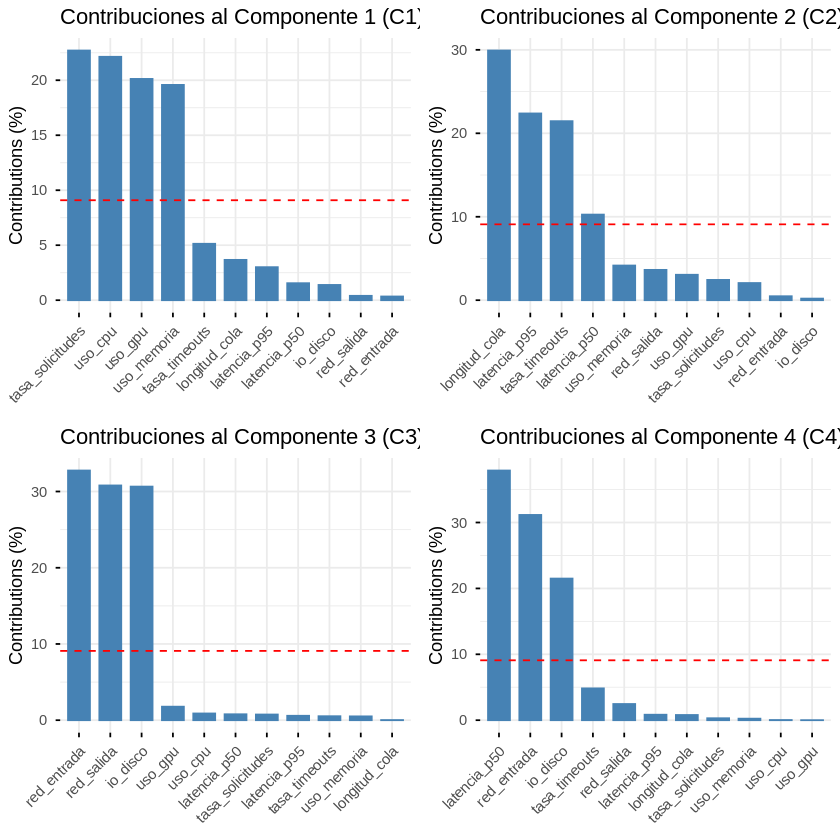

In [15]:
g4 <- fviz_contrib(res_acp2, choice = "var", axes = 1,
                   col = "steelblue", title = "Contribuciones al Componente 1 (C1)")

g5 <- fviz_contrib(res_acp2, choice = "var", axes = 2,
                   col = "steelblue", title = "Contribuciones al Componente 2 (C2)")

g6 <- fviz_contrib(res_acp2, choice = "var", axes = 3,
                   col = "steelblue", title = "Contribuciones al Componente 3 (C3)")

g7 <- fviz_contrib(res_acp2, choice = "var", axes = 4,
                   col = "steelblue", title = "Contribuciones al Componente 4 (C4)")


ggarrange(g4, g5, g6, g7, ncol = 2, nrow = 2)


**Calidad de representación (correlación de cada variable con los componentes)**

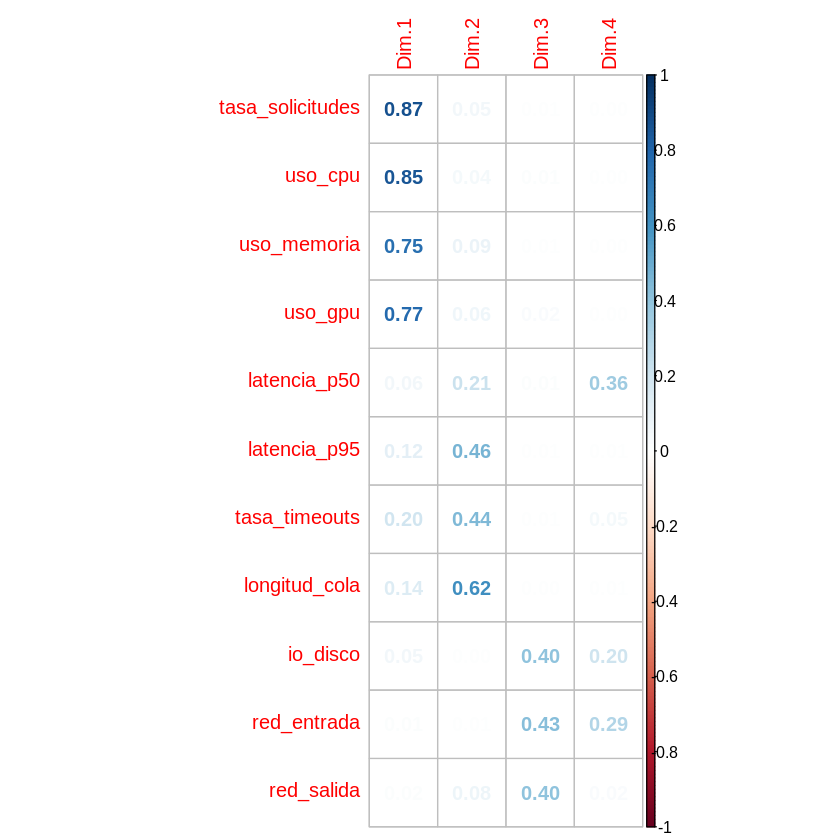

In [16]:
var <- get_pca_var(res_acp2)

corrplot(var$cos2, method = "number")


**Biplot conjunto**

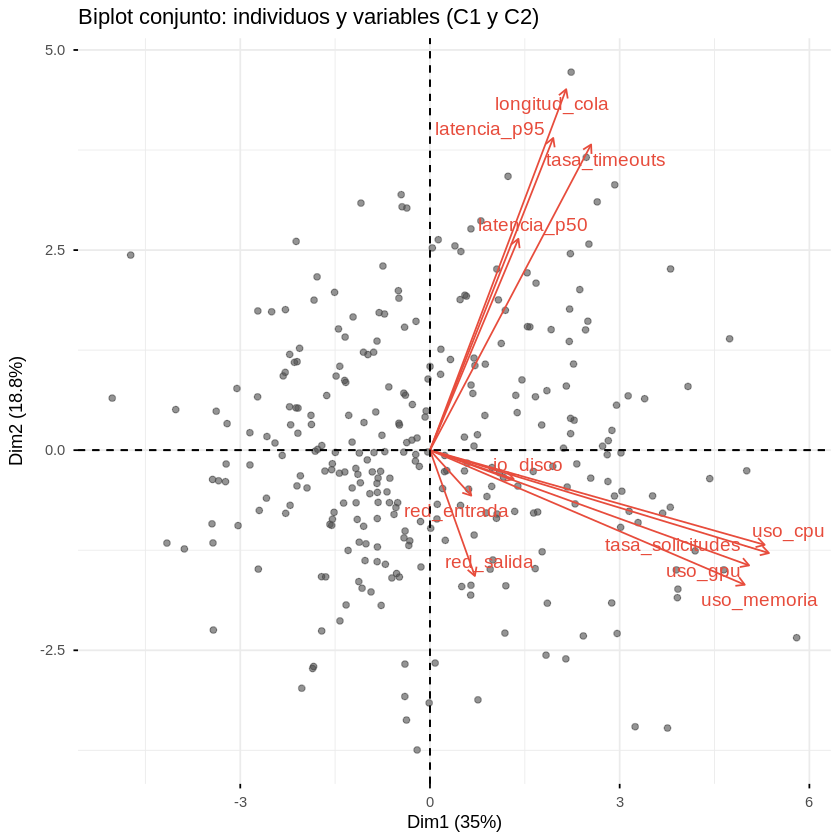

In [47]:
fviz_pca_biplot(res_acp2,
                repel = TRUE,
                col.var = "#E74C3C",   # color para las variables (rojo)
                col.ind = "gray30",    # color para los individuos (puntos)
                alpha.ind = 0.6,       # transparencia de los puntos
                label = "var",         # mostrar solo etiquetas de variables
                title = "Biplot conjunto: individuos y variables (C1 y C2)")


## **ETAPA 2. INDICE**

**Índice ACP con los d4 primeros componentes ponderados**

In [22]:
# Extraer coordenadas de los individuos (las 4 dimensiones seleccionadas)
coord_ind <- res_acp2$ind$coord[, 1:4]

In [12]:
dim(coord_ind)  #300 individuos * 4 componentes

[1] 300   4

In [23]:
# Extraer eigenvalues (porcentajes de varianza explicada)
eig <- res_acp2$eig

In [24]:
eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.84931586,34.9937806,34.99378
comp 2,2.06746684,18.7951531,53.78893
comp 3,1.31015404,11.9104913,65.69942
comp 4,0.93713203,8.5193821,74.21881
comp 5,0.77735700,7.0668818,81.28569
comp 6,0.75191070,6.8355519,88.12124
comp 7,0.55018977,5.0017252,93.12297
comp 8,0.31309888,2.8463534,95.96932
comp 9,0.21577624,1.9616022,97.93092
comp 10,0.15015835,1.3650759,99.29600


In [27]:
# Calcular pesos (proporción de varianza explicada)
peso_dim1 <- eig[1, 2] / 100  #3.8493 / sum(eig[,1]) * 100  = PVj%
peso_dim2 <- eig[2, 2] / 100
peso_dim3 <- eig[3, 2] / 100
peso_dim4 <- eig[4, 2] / 100


In [32]:
peso_dim1  #en proporción

[1] 0.3499378

In [33]:
# Calcular el índice ACP ponderado con las 4 dimensiones
indice_ACP <- (coord_ind[,1] * peso_dim1) +
              (coord_ind[,2] * peso_dim2) +
              (coord_ind[,3] * peso_dim3) +
              (coord_ind[,4] * peso_dim4)

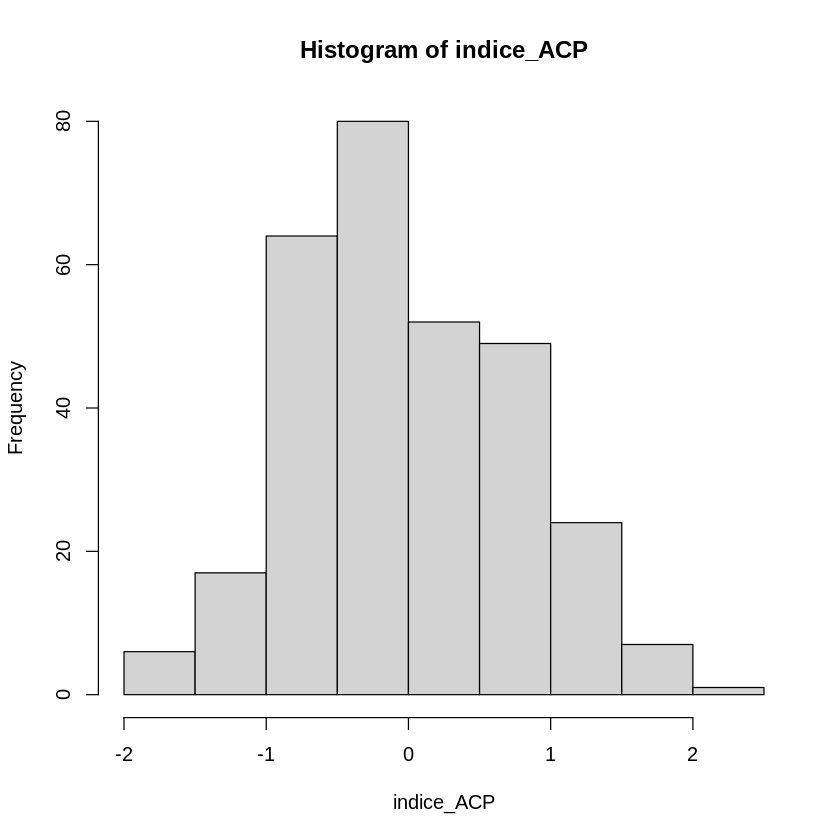

In [34]:
hist(indice_ACP)

In [35]:
# Normalizar el índice (0–100)
indice_rescalado <- (indice_ACP - min(indice_ACP)) / (max(indice_ACP) - min(indice_ACP)) * 100

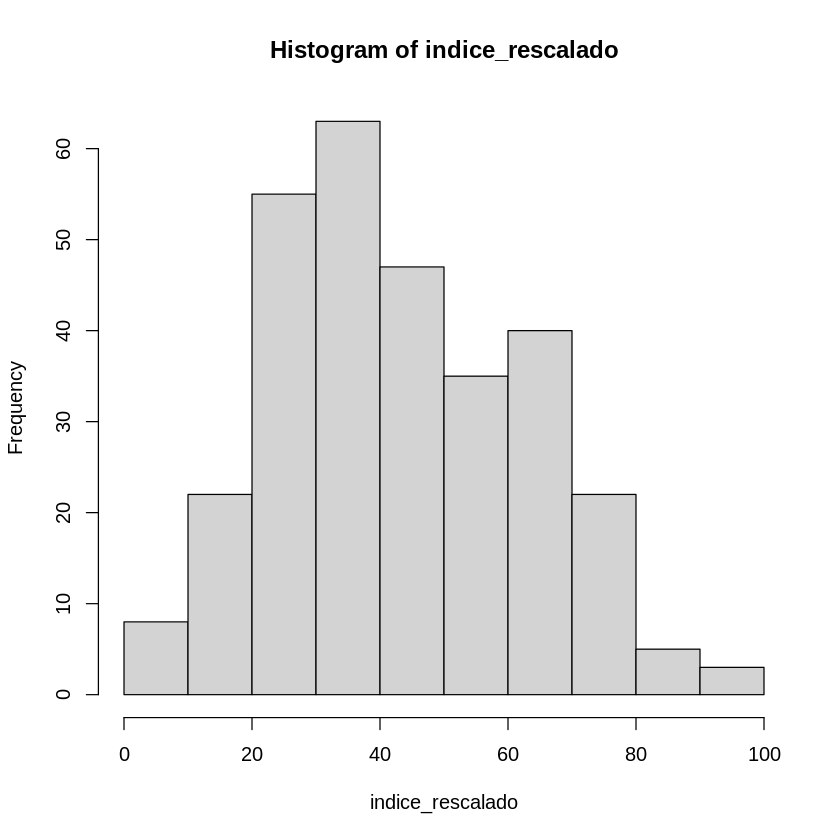

In [36]:
hist(indice_rescalado)

In [40]:

df_caso1_limpio$Indice_Rendimiento <- as.numeric(indice_ACP)
df_caso1_limpio$Indice_Rendimiento_Escalado <- as.numeric(indice_rescalado)


In [41]:
head(df_caso1_limpio, 20)

,tasa_solicitudes,uso_cpu,uso_memoria,uso_gpu,latencia_p50,latencia_p95,tasa_timeouts,longitud_cola,io_disco,red_entrada,red_salida,Indice_Rendimiento,Indice_Rendimiento_Escalado
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,173.89309,44.32321,44.57507,19.26239,94.97738,168.3258,0.10246634,7.706195,50.04404,61.49192,50.10022,-0.959203841,18.504500
2,179.11632,51.89695,50.40925,27.32759,97.70407,168.2047,0.10246634,7.511553,62.93526,66.92107,56.68764,-0.426351093,32.188483
3,260.65158,70.23352,65.13805,53.98072,104.15590,169.7323,0.10246634,6.260759,55.93084,62.53779,64.86292,0.390848469,53.174666
4,213.94829,45.74935,57.78791,42.40458,94.73634,167.6039,0.86435799,6.358044,45.63268,52.49116,57.42772,-0.653533739,26.354294
5,213.83188,53.19809,61.45749,42.63682,102.02709,183.8532,1.07050255,12.869480,40.22474,66.25733,56.84495,0.375169076,52.772010
6,264.01282,75.62978,83.11790,59.54391,93.87520,188.6435,2.13843384,11.629358,58.88930,66.48363,64.14325,1.314197986,76.886845
7,216.62482,47.54880,50.98280,41.26725,90.40687,178.4785,2.72888049,6.565170,54.85931,57.95161,67.19643,-0.198164741,38.048448
8,149.97177,39.67521,38.18746,17.30432,96.22047,160.5598,0.19283688,9.620631,48.78034,38.68289,54.76122,-1.547112511,3.406646
9,181.72240,42.27298,54.49052,27.59591,105.82516,188.2914,2.40652015,13.662998,40.27400,68.36822,62.06247,0.358561562,52.345519


## **ETAPA 3. CLUSTER**

In [42]:
# Extraer las coordenadas de los individuos (4 componentes)
coord_ind <- res_acp2$ind$coord[, 1:4]

In [43]:
dim(coord_ind)

[1] 300   4

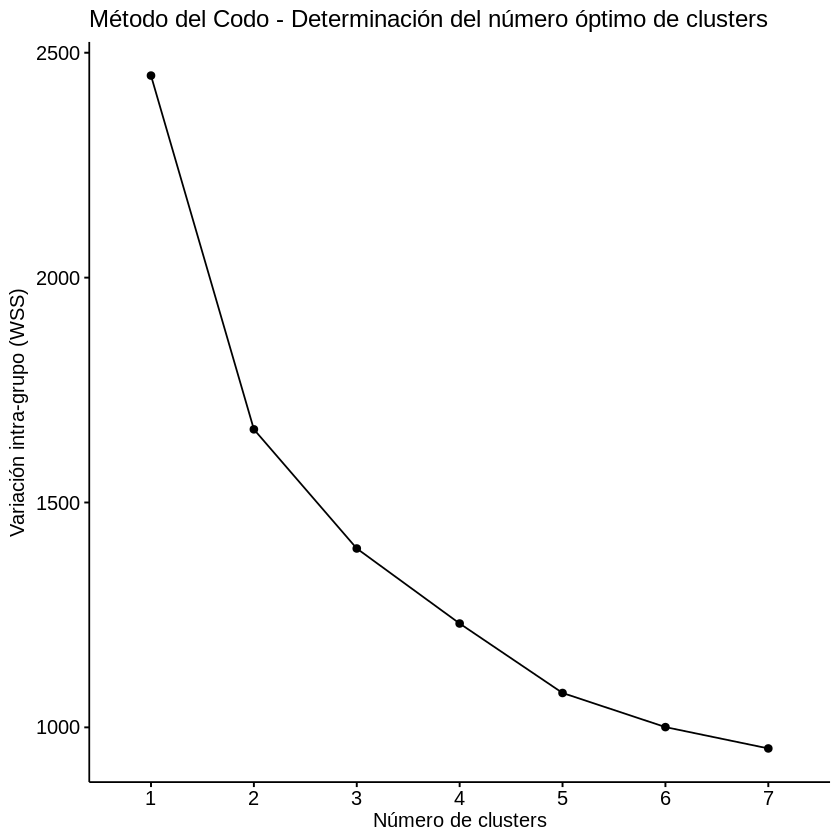

In [44]:
# Evaluar número óptimo de clusters (lo hace con 7 grupos PREDETERIMINADO peor escojemos por punto d einfleccion)
fviz_nbclust(coord_ind,
             FUNcluster = kmeans,
             method = "wss",
             k.max = 7,
             linecolor = "black") +
  xlab("Número de clusters") +
  ylab("Variación intra-grupo (WSS)") +
  ggtitle("Método del Codo - Determinación del número óptimo de clusters")

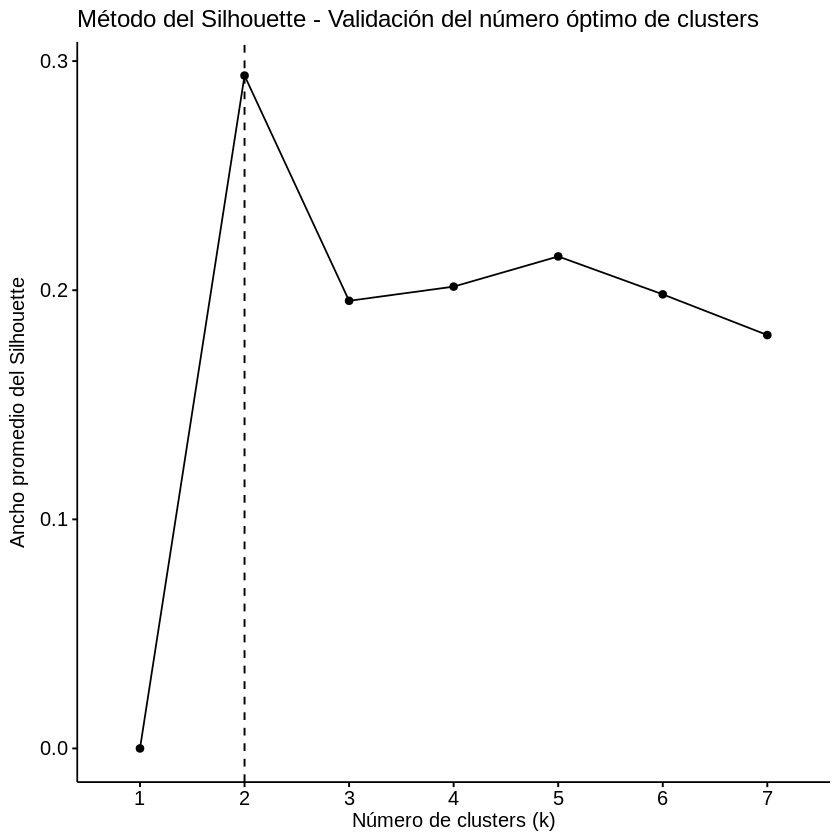

In [46]:
fviz_nbclust(coord_ind,
             FUNcluster = kmeans,
             method = "silhouette",
             k.max = 7,
             linecolor = "black") +
  xlab("Número de clusters (k)") +
  ylab("Ancho promedio del Silhouette") +
  ggtitle("Método del Silhouette - Validación del número óptimo de clusters")


In [47]:
# --- Clustering con K-means ---
set.seed(123)
coord_ind <- res_acp2$ind$coord[, 1:4]  # 4 primeros componentes seleccionados

kmeans_res <- kmeans(coord_ind, centers = 2, nstart = 25)  #Usamos 2 clusters y 25 inicializaciones distintas



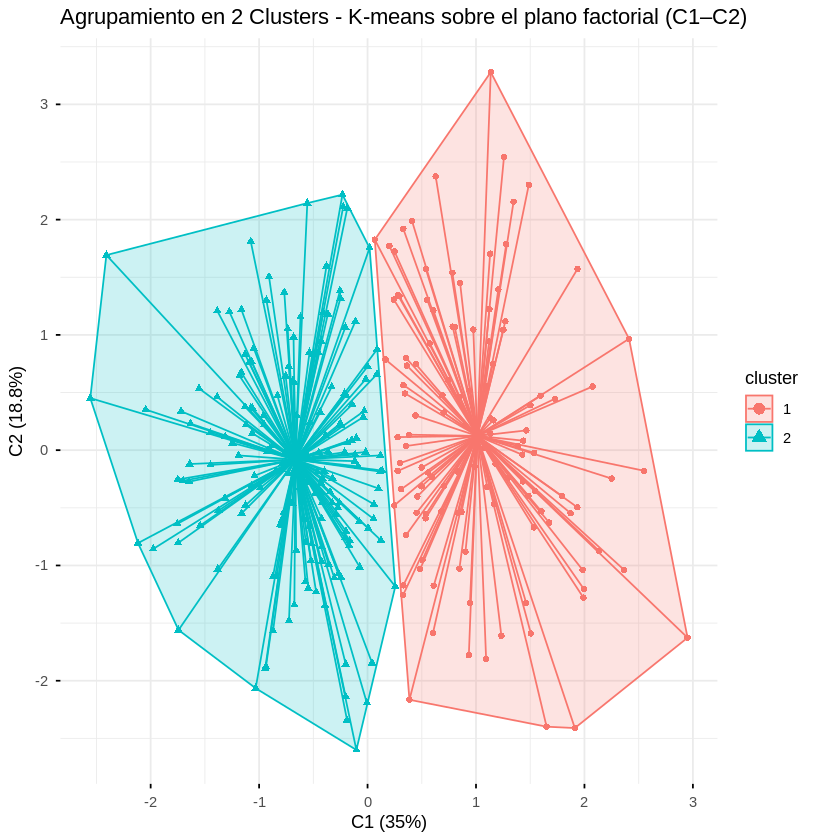

In [57]:
# --- Gráfico del agrupamiento ---
fviz_cluster(kmeans_res,
             data = res_acp2$ind$coord[, 1:2],   # solo usamos C1 y C2 del ACP, sin recalcular PCA
             geom = "point",
             show.clust.cent = TRUE,
             star.plot = TRUE,
             ggtheme = theme_minimal(),
             main = "Agrupamiento en 2 Clusters - K-means sobre el plano factorial (C1–C2)") +
  xlab(paste0("C1 (", round(res_acp2$eig[1, 2], 1), "%)")) +
  ylab(paste0("C2 (", round(res_acp2$eig[2, 2], 1), "%)"))

In [54]:
#Lo pongo en la tbals por clister 1 o 2
df_caso1_limpio$Cluster <- kmeans_res$cluster

# distribución de observaciones por grupo
table(df_caso1_limpio$Cluster)


head(df_caso1_limpio, 20)


  1   2 
119 181 

,tasa_solicitudes,uso_cpu,uso_memoria,uso_gpu,latencia_p50,latencia_p95,tasa_timeouts,longitud_cola,io_disco,red_entrada,red_salida,Indice_Rendimiento,Indice_Rendimiento_Escalado,Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,173.89309,44.32321,44.57507,19.26239,94.97738,168.3258,0.10246634,7.706195,50.04404,61.49192,50.10022,-0.959203841,18.504500,2
2,179.11632,51.89695,50.40925,27.32759,97.70407,168.2047,0.10246634,7.511553,62.93526,66.92107,56.68764,-0.426351093,32.188483,2
3,260.65158,70.23352,65.13805,53.98072,104.15590,169.7323,0.10246634,6.260759,55.93084,62.53779,64.86292,0.390848469,53.174666,1
4,213.94829,45.74935,57.78791,42.40458,94.73634,167.6039,0.86435799,6.358044,45.63268,52.49116,57.42772,-0.653533739,26.354294,2
5,213.83188,53.19809,61.45749,42.63682,102.02709,183.8532,1.07050255,12.869480,40.22474,66.25733,56.84495,0.375169076,52.772010,1
6,264.01282,75.62978,83.11790,59.54391,93.87520,188.6435,2.13843384,11.629358,58.88930,66.48363,64.14325,1.314197986,76.886845,1
7,216.62482,47.54880,50.98280,41.26725,90.40687,178.4785,2.72888049,6.565170,54.85931,57.95161,67.19643,-0.198164741,38.048448,2
8,149.97177,39.67521,38.18746,17.30432,96.22047,160.5598,0.19283688,9.620631,48.78034,38.68289,54.76122,-1.547112511,3.406646,2
9,181.72240,42.27298,54.49052,27.59591,105.82516,188.2914,2.40652015,13.662998,40.27400,68.36822,62.06247,0.358561562,52.345519,2


Ignoring unknown labels:
• linetype : "Cluster"


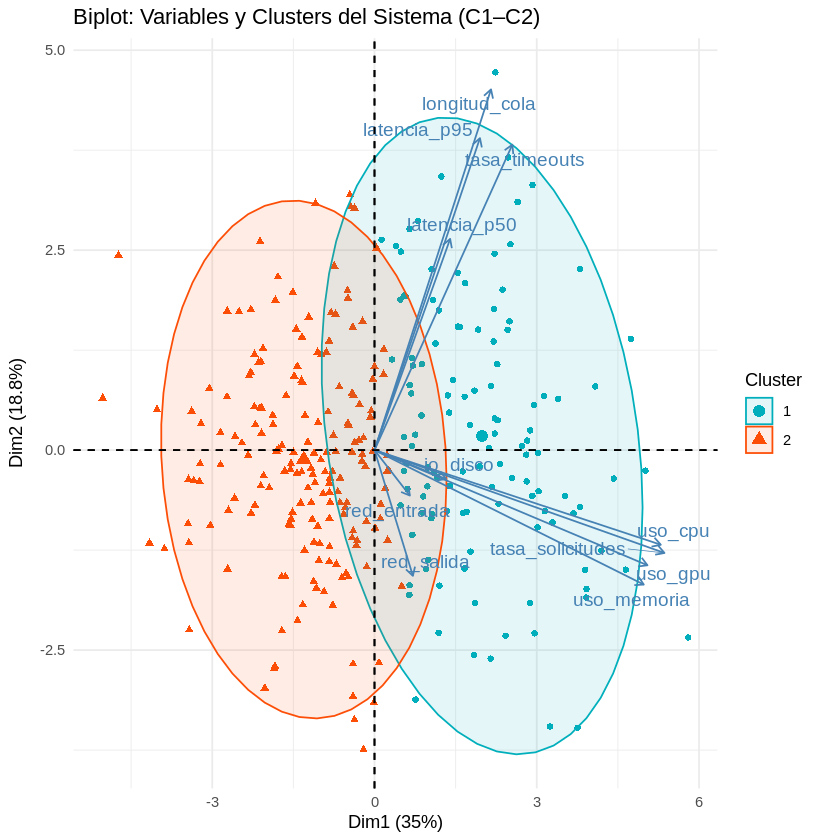

In [56]:

df_caso1_limpio$Cluster <- as.factor(df_caso1_limpio$Cluster)

# --- Biplot de variables y clusters ---
fviz_pca_biplot(res_acp2,
                geom.ind = "point",
                col.ind = df_caso1_limpio$Cluster,
                palette = c("#00AFBB", "#FC4E07"),
                addEllipses = TRUE,
                label = "var",
                repel = TRUE,
                legend.title = "Cluster") +
  ggtitle("Biplot: Variables y Clusters del Sistema (C1–C2)") +
  theme_minimal()


In [59]:
# --- Clustering jerárquico + K-means (HCPC) ---


# Usamos el resultado del ACP ya existente
clusterHurto <- HCPC(res_acp2, nb.clust = 2, graph = FALSE)


In [64]:
table(kmeans_res$cluster)
table(clusterHurto$data.clust$clust)



  1   2 
119 181 


  1   2 
181 119 

In [60]:
clusterHurto$desc.var


,Eta2,P-value
uso_cpu,0.54398194,9.633714e-53
tasa_solicitudes,0.52628126,2.851870e-50
uso_gpu,0.48507969,7.401169e-45
uso_memoria,0.48333373,1.227769e-44
tasa_timeouts,0.20284151,2.165362e-16
longitud_cola,0.13857179,2.708301e-11
latencia_p95,0.12629875,2.329974e-10
latencia_p50,0.05781653,2.562094e-05
io_disco,0.03661660,8.642285e-04
red_entrada,0.01925281,1.617646e-02


## **ETAPA 4. NUEVAS VARIABLES**

In [61]:
df_caso1_limpio <- df_caso1_limpio %>%
  mutate(
    Tipo_Cluster = case_when(
      Cluster == 1 ~ "Baja carga / estable",
      Cluster == 2 ~ "Alta carga / riesgo"
    )
  )


head(df_caso1_limpio, 20)

,tasa_solicitudes,uso_cpu,uso_memoria,uso_gpu,latencia_p50,latencia_p95,tasa_timeouts,longitud_cola,io_disco,red_entrada,red_salida,Indice_Rendimiento,Indice_Rendimiento_Escalado,Cluster,Tipo_Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,173.89309,44.32321,44.57507,19.26239,94.97738,168.3258,0.10246634,7.706195,50.04404,61.49192,50.10022,-0.959203841,18.504500,2,Alta carga / riesgo
2,179.11632,51.89695,50.40925,27.32759,97.70407,168.2047,0.10246634,7.511553,62.93526,66.92107,56.68764,-0.426351093,32.188483,2,Alta carga / riesgo
3,260.65158,70.23352,65.13805,53.98072,104.15590,169.7323,0.10246634,6.260759,55.93084,62.53779,64.86292,0.390848469,53.174666,1,Baja carga / estable
4,213.94829,45.74935,57.78791,42.40458,94.73634,167.6039,0.86435799,6.358044,45.63268,52.49116,57.42772,-0.653533739,26.354294,2,Alta carga / riesgo
5,213.83188,53.19809,61.45749,42.63682,102.02709,183.8532,1.07050255,12.869480,40.22474,66.25733,56.84495,0.375169076,52.772010,1,Baja carga / estable
6,264.01282,75.62978,83.11790,59.54391,93.87520,188.6435,2.13843384,11.629358,58.88930,66.48363,64.14325,1.314197986,76.886845,1,Baja carga / estable
7,216.62482,47.54880,50.98280,41.26725,90.40687,178.4785,2.72888049,6.565170,54.85931,57.95161,67.19643,-0.198164741,38.048448,2,Alta carga / riesgo
8,149.97177,39.67521,38.18746,17.30432,96.22047,160.5598,0.19283688,9.620631,48.78034,38.68289,54.76122,-1.547112511,3.406646,2,Alta carga / riesgo
9,181.72240,42.27298,54.49052,27.59591,105.82516,188.2914,2.40652015,13.662998,40.27400,68.36822,62.06247,0.358561562,52.345519,2,Alta carga / riesgo


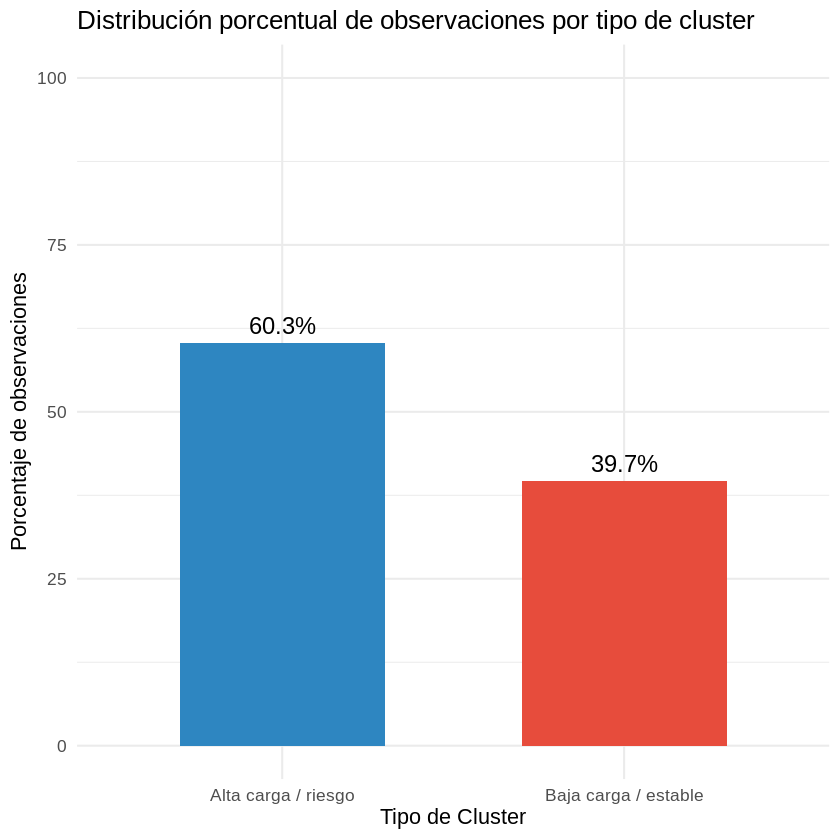

In [63]:
df_porcentajes <- df_caso1_limpio %>%
  count(Tipo_Cluster) %>%
  mutate(pct = n / sum(n) * 100)

# Gráfico de barras con porcentajes
ggplot(df_porcentajes, aes(x = Tipo_Cluster, y = pct, fill = Tipo_Cluster)) +
  geom_col(width = 0.6, show.legend = FALSE) +
  geom_text(aes(label = paste0(round(pct, 1), "%")), vjust = -0.5, size = 5) +
  labs(
    title = "Distribución porcentual de observaciones por tipo de cluster",
    x = "Tipo de Cluster",
    y = "Porcentaje de observaciones"
  ) +
  scale_fill_manual(values = c("#2E86C1", "#E74C3C")) +
  ylim(0, 100) +
  theme_minimal(base_size = 13)